In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# package imports to setup simulator experiments
from src.vsim import electorate
from src.vsim.simulation import VotingSimulator

# Electorate

We represent our electorate as an (m,n) dimensional matrix where m corresponds to each individual voter, and n corresponds to their opinion or preference of a given topic. Topics are not actually real and should be seen a simplification of randomly generating voter preferences in a way we can easily control and adjust. To ensure we can the effect of different underlying electorate dynamics (e.g. polarisation), we can generate electorates with different skews and biases. Below is a sample in a 2D dimensional case (each voter has a unique preference on two issues).

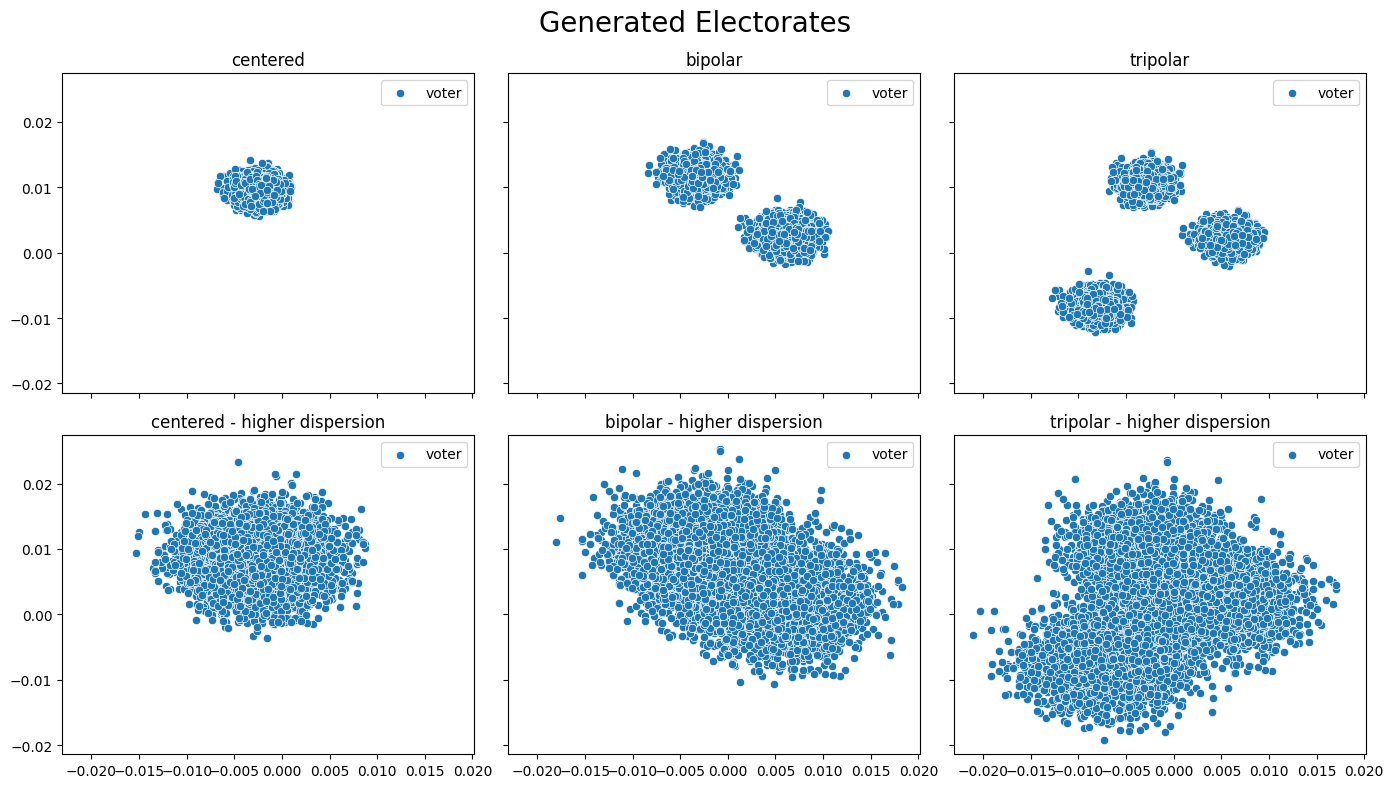

In [13]:
from src.vsim import electorate

# params for generation; note that given O(n^2) for NN search, it is recommended to note over do population size.
SEED = 42
ISSUES = 2
POPULATION_SIZE = 10_000

centered = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="centered", seed=SEED)
bipolar = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="bipolar", seed=SEED)
tripolar = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="tripolar", seed=SEED)

# same but increase diversity of intra-cluster opinion; parameterised homogenity of opinion
CLUSTER_STD = 3.5
centered_wide = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="centered", seed=SEED, cluster_std=CLUSTER_STD)
bipolar_wide = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="bipolar", seed=SEED, cluster_std=CLUSTER_STD)
tripolar_wide = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="tripolar", seed=SEED, cluster_std=CLUSTER_STD)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharey=True, sharex=True, tight_layout=True, figsize=(14, 8))

# normal
sns.scatterplot(x=centered[:, 0], y=centered[:, 1], ax=ax1, label="voter")
ax1.set_title("centered - no dispersion")

sns.scatterplot(x=bipolar[:, 0], y=bipolar[:, 1], ax=ax2, label="voter")        
ax2.set_title("bipolar - no dispersion")

sns.scatterplot(x=tripolar[:, 0], y=tripolar[:, 1], ax=ax3, label="voter")
ax3.set_title("tripolar - no dispersion")

# increased dispersion
sns.scatterplot(x=centered_wide[:, 0], y=centered_wide[:, 1], ax=ax4, label="voter")
ax4.set_title("centered - higher dispersion")

sns.scatterplot(x=bipolar_wide[:, 0], y=bipolar_wide[:, 1], ax=ax5, label="voter")        
ax5.set_title("bipolar - higher dispersion")

sns.scatterplot(x=tripolar_wide[:, 0], y=tripolar_wide[:, 1], ax=ax6, label="voter")
ax6.set_title("tripolar - higher dispersion")

fig.suptitle("Generated Electorates", fontsize=20)
plt.show()

NOTE: that our candidate preference ranges are normalised to ensure we can compare distances in a reliable way despite introducing arbitrary skewing. 

# Candidates

candidate info here

# Measuring fairness

Fairness is not well defined, even within the political science literature, but to ensure we can adequately compare different systems in a simulated setting, we have opted for a simple metric, namely the average distance from the winner(s) of the election. This average is calculated over every voter, taking the euclidian distance to the winner (or winners) of the election. If there are multiple equally weighted winners, the distance is averaged across winners.

In the simple case of pluralism and majority in a non-proportional system, commonly observed in elections of the executive branch in Rebublics (simplified U.S. case without electoral votes but still).

# Pluralism vs. Majority

Pluralism is defined as the winner is the one with the most votes. Majority on the other hand requires that a givne candidate meets a threshold of 50% of the vote to be crowned winner, otherwise the election is repeated. Typically, there is a reduction in the candidate pool to ensure the elections converge on a winner; we follow suit and reduce the candidate pool by 1, removing the lowest performing candidate at each round where a definte majority cannot be crowned.

Below both are illustrated and constrated with respect to our fairness metric.